## Basics array operations using numpy 



In [1]:
import numpy as np

a = np.array([5, 6, 9])
print(a[0])
print(a[1])
print(a.dtype)

a = np.array([[1,2], [3,4]], dtype=np.float64)
print(a.itemsize)
print(a.size)
print(a.shape)
print(a)


5
6
int32
8
4
(2, 2)
[[1. 2.]
 [3. 4.]]


### Reshape the matrix

In [2]:
#print(a.reshape(2, 3))

In [3]:
a.sum(axis = 0)

array([4., 6.])

In [4]:
np.sqrt(a)

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])

In [5]:
b = np.array([[5,6], [7,8]])

print(a + b)

[[ 6.  8.]
 [10. 12.]]


In [6]:
a.dot(b)

array([[19., 22.],
       [43., 50.]])

In [7]:
npzeros=np.zeros((3,4))
npones=np.ones((3, 4)) * 9

print(npones)

[[9. 9. 9. 9.]
 [9. 9. 9. 9.]
 [9. 9. 9. 9.]]


## Pandas

### Covid data: test by date, province and region

In [8]:
import pandas as pd

# https://epistat.sciensano.be/covid/

df = pd.read_csv('C:/Users/Public/lmaaya/projects/python/JupiterNoteBook/data/COVID19BE_tests.csv', parse_dates=["DATE"])
df.head()

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS
0,2020-03-01,Antwerpen,Flanders,18,0
1,2020-03-01,BrabantWallon,Wallonia,8,0
2,2020-03-01,Brussels,Brussels,4,0
3,2020-03-01,Hainaut,Wallonia,5,0
4,2020-03-01,Limburg,Flanders,7,0


In [9]:
rows, columns = df.shape

from IPython.display import Markdown as md

# https://data-dive.com/jupyterlab-markdown-cells-include-variables/
# Instead of setting the cell to Markdown, create Markdown from withnin a code cell!
# We can just use python variable replacement syntax to make the text dynamic
md("The data consists of {} observations and {} variables.".format(rows, columns))


The data consists of 14496 observations and 5 variables.

In [10]:
df[["DATE", "PROVINCE", "TESTS_ALL"]][df.DATE == '2021-03-03']

,DATE,PROVINCE,TESTS_ALL
4404,2021-03-03,Antwerpen,7991
4405,2021-03-03,BrabantWallon,1605
4406,2021-03-03,Brussels,5627
4407,2021-03-03,Hainaut,4990
4408,2021-03-03,Limburg,3395
4409,2021-03-03,Liège,3565
4410,2021-03-03,Luxembourg,1115
4411,2021-03-03,Namur,1428
4412,2021-03-03,OostVlaanderen,8760
4413,2021-03-03,VlaamsBrabant,5221


In [11]:
df.set_index('DATE', inplace=True)
df.head()

,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS
DATE,,,,
2020-03-01,Antwerpen,Flanders,18,0
2020-03-01,BrabantWallon,Wallonia,8,0
2020-03-01,Brussels,Brussels,4,0
2020-03-01,Hainaut,Wallonia,5,0
2020-03-01,Limburg,Flanders,7,0


### Date with the most tests done

In [12]:

df.reset_index(inplace=True)
df['DATE'][df['TESTS_ALL'] == df['TESTS_ALL'].max()]

7608   2021-11-25
Name: DATE, dtype: datetime64[ns]

### Date with the most positive tests

In [13]:
df['DATE'][df['TESTS_ALL_POS'] == df['TESTS_ALL_POS'].max()]

8340   2022-01-25
Name: DATE, dtype: datetime64[ns]

### Missing data with pandas


In [14]:
# replace NAs with
new_df = df.fillna(0)
new_df.head(n=5)

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS
0,2020-03-01,Antwerpen,Flanders,18,0
1,2020-03-01,BrabantWallon,Wallonia,8,0
2,2020-03-01,Brussels,Brussels,4,0
3,2020-03-01,Hainaut,Wallonia,5,0
4,2020-03-01,Limburg,Flanders,7,0


### replace NAs with a dictionary

In [15]:


new_df = df.fillna({
    'PROVINCE' : "No province name",
    'REGION': "No region name"
})
 
new_df.head(5)    
    

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS
0,2020-03-01,Antwerpen,Flanders,18,0
1,2020-03-01,BrabantWallon,Wallonia,8,0
2,2020-03-01,Brussels,Brussels,4,0
3,2020-03-01,Hainaut,Wallonia,5,0
4,2020-03-01,Limburg,Flanders,7,0


### drop missing rows


In [16]:

new_df = df.dropna(how = 'all') #drop if it has all na

new_df = df.dropna(thresh=2) # keep all where there at least 2 valid values
new_df.head(5)

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS
0,2020-03-01,Antwerpen,Flanders,18,0
1,2020-03-01,BrabantWallon,Wallonia,8,0
2,2020-03-01,Brussels,Brussels,4,0
3,2020-03-01,Hainaut,Wallonia,5,0
4,2020-03-01,Limburg,Flanders,7,0


### Fill in missing dates

In [17]:
df_new = df

#dt= pd.date_range("01-01-2020", "01-11-2023")
#idx = pd.DatetimeIndex(dt)

#df_new = df_new.reindex(idx)
df_new.tail(7)

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS
14489,2023-06-21,Liège,Wallonia,2,0
14490,2023-06-21,Luxembourg,Wallonia,0,0
14491,2023-06-21,Namur,Wallonia,0,0
14492,2023-06-21,OostVlaanderen,Flanders,1,0
14493,2023-06-21,VlaamsBrabant,Flanders,1,0
14494,2023-06-21,WestVlaanderen,Flanders,4,0
14495,2023-06-21,NaN,NaN,0,0


### Date with the highest proportion of tests turning out positive

In [26]:

# create a variable
df['TESTS_ALL_POSProp'] = df['TESTS_ALL_POS']/df['TESTS_ALL']
# df[10000:10010]
df[['DATE', 'PROVINCE', 'REGION', 'TESTS_ALL', 'TESTS_ALL_POS', 'TESTS_ALL_POSProp']][df['TESTS_ALL_POSProp'] == df['TESTS_ALL_POSProp'].max()]

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS,TESTS_ALL_POSProp
234,2020-03-20,Luxembourg,Wallonia,15,9,0.6


### Analyze using Group By

In [99]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/Wb2Tp35dZ-I" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>

In [100]:
g = df.groupby(["REGION"]) # df.groupby(["PROVINCE", "REGION"])
g

In [105]:
for REGION, REGION_df in g:
    print(REGION)
    print(REGION_df.head(5))

Antwerpen
         DATE   PROVINCE    REGION  TESTS_ALL  TESTS_ALL_POS
0  2020-03-01  Antwerpen  Flanders         18              0
12 2020-03-02  Antwerpen  Flanders         38              1
24 2020-03-03  Antwerpen  Flanders        112              1
36 2020-03-04  Antwerpen  Flanders        131              3
48 2020-03-05  Antwerpen  Flanders        118              9
BrabantWallon
         DATE       PROVINCE    REGION  TESTS_ALL  TESTS_ALL_POS
1  2020-03-01  BrabantWallon  Wallonia          8              0
13 2020-03-02  BrabantWallon  Wallonia          5              0
25 2020-03-03  BrabantWallon  Wallonia          8              0
37 2020-03-04  BrabantWallon  Wallonia         20              2
49 2020-03-05  BrabantWallon  Wallonia         25              2
Brussels
         DATE  PROVINCE    REGION  TESTS_ALL  TESTS_ALL_POS
2  2020-03-01  Brussels  Brussels          4              0
14 2020-03-02  Brussels  Brussels         17              3
26 2020-03-03  Brussels  Brusse

C:\Users\PC\AppData\Local\Temp\ipykernel_15256\115065848.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for REGION, REGION_df in g:


In [108]:
VB = g.get_group("VlaamsBrabant")
VB.head(5)

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS
9,2020-03-01,VlaamsBrabant,Flanders,15,0
21,2020-03-02,VlaamsBrabant,Flanders,73,6
33,2020-03-03,VlaamsBrabant,Flanders,127,6
45,2020-03-04,VlaamsBrabant,Flanders,148,9
57,2020-03-05,VlaamsBrabant,Flanders,140,12


In [111]:
# Max by group
g.max()

,DATE,REGION,TESTS_ALL,TESTS_ALL_POS
PROVINCE,,,,
Antwerpen,2023-06-21,Flanders,23730,11109
BrabantWallon,2023-06-21,Wallonia,5571,2809
Brussels,2023-06-21,Brussels,15843,7345
Hainaut,2023-06-21,Wallonia,18892,9300
Limburg,2023-06-21,Flanders,11606,5342
Liège,2023-06-21,Wallonia,13029,6682
Luxembourg,2023-06-21,Wallonia,3805,1937
Namur,2023-06-21,Wallonia,6711,3373
OostVlaanderen,2023-06-21,Flanders,23590,10317


In [112]:
g.mean()

C:\Users\PC\AppData\Local\Temp\ipykernel_15256\2978112660.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g.mean()


,TESTS_ALL,TESTS_ALL_POS
PROVINCE,,
Antwerpen,4936.193709,685.526490
BrabantWallon,1091.245861,157.812914
Brussels,3639.075331,468.557947
Hainaut,3004.014901,475.491722
Limburg,2188.819536,322.793874
Liège,2375.029801,384.848510
Luxembourg,682.577815,109.663079
Namur,1104.163907,180.519040
OostVlaanderen,4256.650662,592.061258


PROVINCE
Antwerpen         Axes(0.125,0.11;0.775x0.77)
BrabantWallon     Axes(0.125,0.11;0.775x0.77)
Brussels          Axes(0.125,0.11;0.775x0.77)
Hainaut           Axes(0.125,0.11;0.775x0.77)
Limburg           Axes(0.125,0.11;0.775x0.77)
Liège             Axes(0.125,0.11;0.775x0.77)
Luxembourg        Axes(0.125,0.11;0.775x0.77)
Namur             Axes(0.125,0.11;0.775x0.77)
OostVlaanderen    Axes(0.125,0.11;0.775x0.77)
VlaamsBrabant     Axes(0.125,0.11;0.775x0.77)
WestVlaanderen    Axes(0.125,0.11;0.775x0.77)
dtype: object

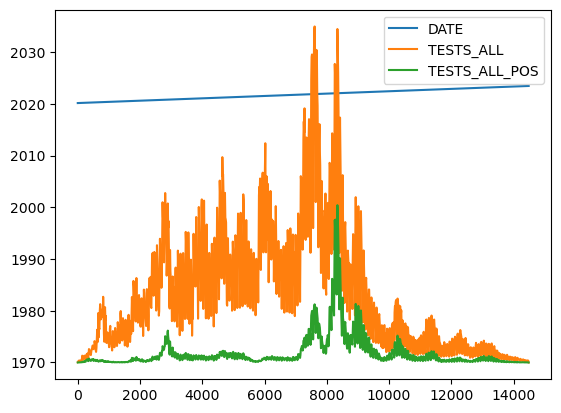

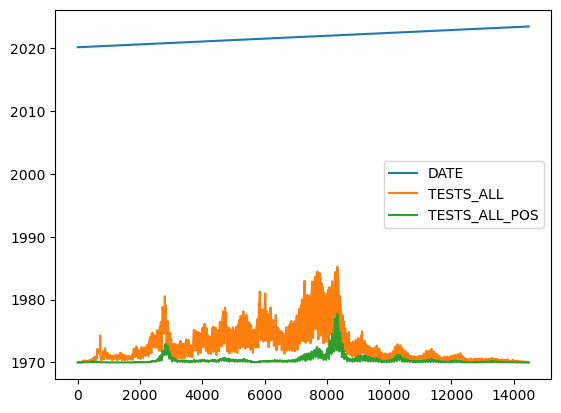

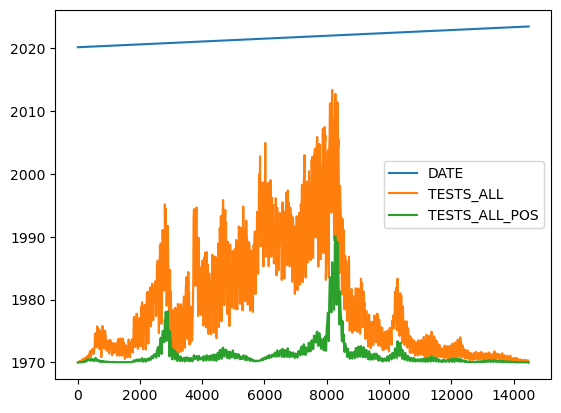

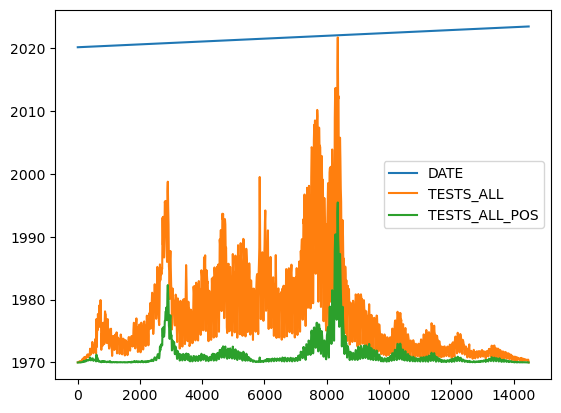

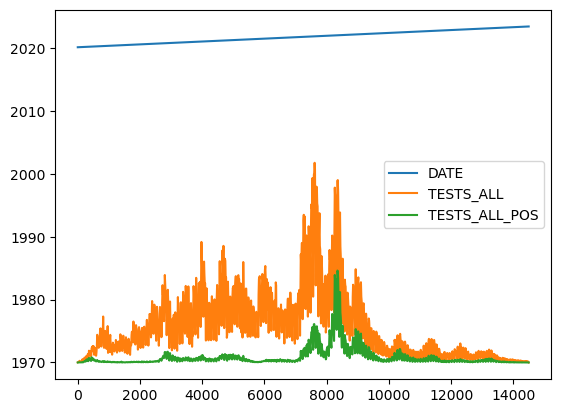

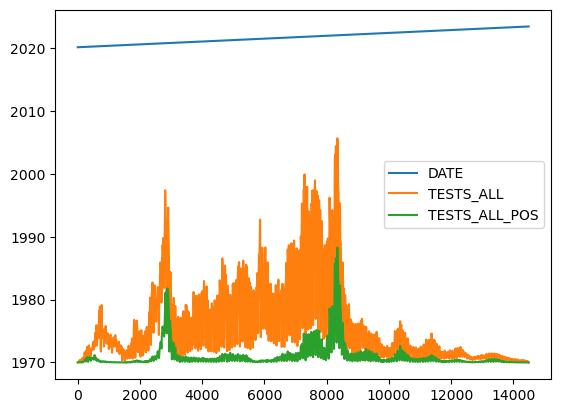

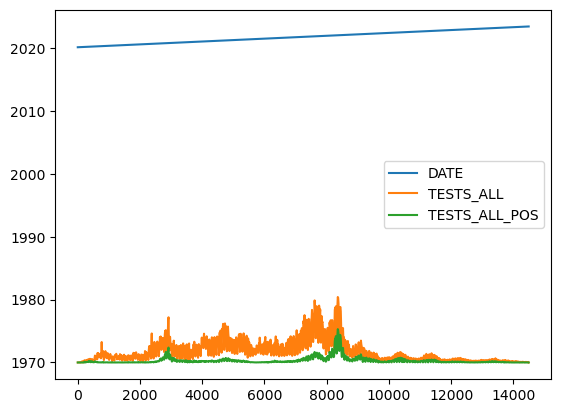

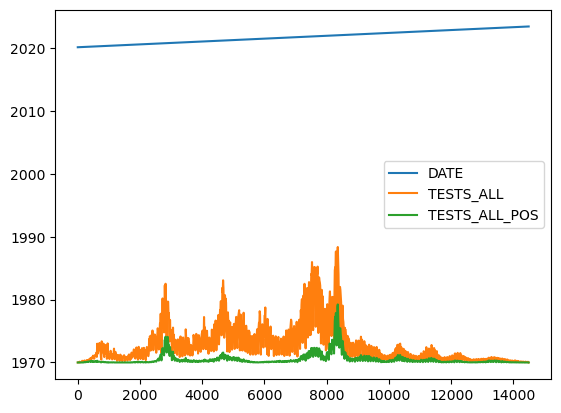

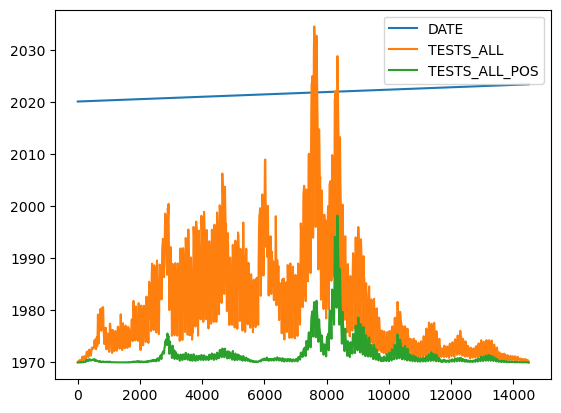

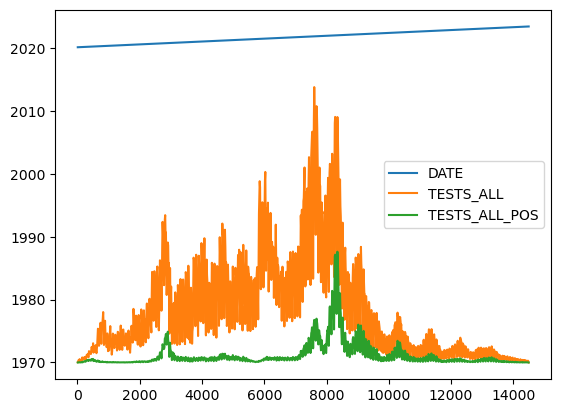

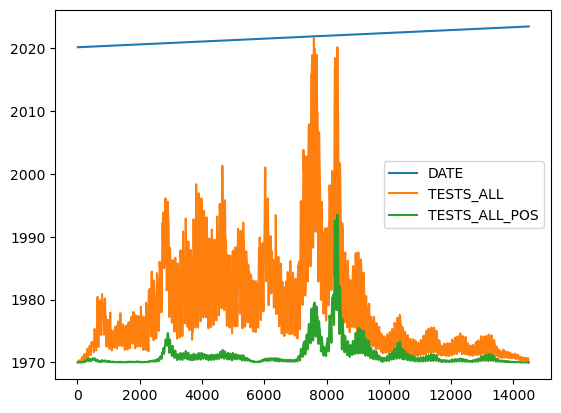

In [113]:
%matplotlib inline
g.plot()

### concatenate

In [31]:
kenya_weather = pd.DataFrame({
"city": ["Nairobi", "Mombasa", "Bungoma"],
    "temperature":[17, 32, 25],
    "humidity":[65, 80, 75]
         
})
kenya_weather



,city,temperature,humidity
0,Nairobi,17,65
1,Mombasa,32,80
2,Bungoma,25,75


In [30]:
Belgie_weather = pd.DataFrame({
"city": ["Leuven", "Hasselt", "Brussel"],
    "temperature":[12, 16, 13],
    "humidity":[25,26,20]
})

Belgie_weather

,city,temperature,humidity
0,Leuven,12,25
1,Hasselt,16,26
2,Brussel,13,20


In [33]:
dfcity= pd.concat([kenya_weather, Belgie_weather], ignore_index=True)
dfcity

,city,temperature,humidity
0,Nairobi,17,65
1,Mombasa,32,80
2,Bungoma,25,75
3,Leuven,12,25
4,Hasselt,16,26
5,Brussel,13,20


In [34]:
dfcity= pd.concat([kenya_weather, Belgie_weather],  keys=["kenya", "Belgium"])
dfcity

city  temperature  humidity
kenya   0  Nairobi           17        65
        1  Mombasa           32        80
        2  Bungoma           25        75
Belgium 0   Leuven           12        25
        1  Hasselt           16        26
        2  Brussel           13        20

In [35]:
dfcity.loc['kenya']

,city,temperature,humidity
0,Nairobi,17,65
1,Mombasa,32,80
2,Bungoma,25,75


In [36]:
dfcity.loc['Belgium']

,city,temperature,humidity
0,Leuven,12,25
1,Hasselt,16,26
2,Brussel,13,20


### append columns


In [37]:
temperature_df = pd.DataFrame({
    "city": ["Leuven", "Hasselt", "Brussel"],
    "temperature":[12, 16, 13]
}, index = [0, 1, 2])

temperature_df

,city,temperature
0,Leuven,12
1,Hasselt,16
2,Brussel,13


In [42]:
windspeed_df = pd.DataFrame({
    "city": ["Hasselt", "Leuven", "Brussel"],
    "windspeed":[7, 2, 21]
}, index = [1, 0, 2])

windspeed_df

,city,windspeed
1,Hasselt,7
0,Leuven,2
2,Brussel,21


In [43]:
df_temp_wspeed = pd.concat([temperature_df, windspeed_df], axis=1)
df_temp_wspeed

,city,temperature,city,windspeed
0,Leuven,12,Leuven,2
1,Hasselt,16,Hasselt,7
2,Brussel,13,Brussel,21


### join by series

In [44]:
s = pd.Series(['Humid', "Dry", 'Rain'], name='event')

In [45]:
pd.concat([temperature_df, s], axis=1)

,city,temperature,event
0,Leuven,12,Humid
1,Hasselt,16,Dry
2,Brussel,13,Rain
